# **Aula 07 - Grafos com NetworkX**

**Tópicos da aula:**
- Grafos com NetworkX
- Estudo de Caso
- Exercícios

## **Grafos com NetworkX**

<img src="https://networkx.org/_static/networkx_logo.svg">

Documentação da biblioteca: [NetworkX!](https://networkx.org/documentation/stable/index.html)

#### **Início**

In [3]:
# instalar a lib
%pip install --upgrade scipy networkx

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# importar as libs
from pprint import pprint

import matplotlib.pyplot as plt
import networkx as nx

#### **Criando Grafos (Graph)**

In [ ]:
# criando um grafo
g = nx.Graph()
g

In [ ]:
# criando um digrafo
d = nx.DiGraph()
d

In [ ]:
# criando grafos que multiplas arestas não direcionadas
mg = nx.MultiGraph()
mg

In [ ]:
# criando grafos com multiplas arestas direcionadas
md = nx.MultiDiGraph()
md

#### **Vértices/Nós (Nodes)**

In [ ]:
# adicionando um nó
g.add_node(1)

In [ ]:
# adicionando uma lista de nós
g.add_nodes_from([2, 3, 4, 5])

In [ ]:
# verificando os nós criados
g.nodes()

NodeView((1, 2, 3, 4, 5))

In [ ]:
# número de nós
len(g.nodes()), g.number_of_nodes()

(5, 5)

In [ ]:
# verificando se existe um nó
g.has_node(5), g.has_node(10)

(True, False)

#### **Arestas (Edges)**

In [ ]:
# adicionando arestas
g.add_edge(1, 2)

In [ ]:
# adicionando lista de arestas
g.add_edges_from([(1,3), (2,3), (3,4), (3,5)])

In [ ]:
# verificando as arestas criadas
g.edges()

EdgeView([(1, 2), (1, 3), (2, 3), (3, 4), (3, 5)])

In [ ]:
# número de arestas
len(g.edges()), g.number_of_edges()

(5, 5)

In [ ]:
# verificando se existe uma aresta
g.has_edge(3,4), g.has_edge(3,6)

(True, False)

#### **Visualizando o Grafo e suas Informações**

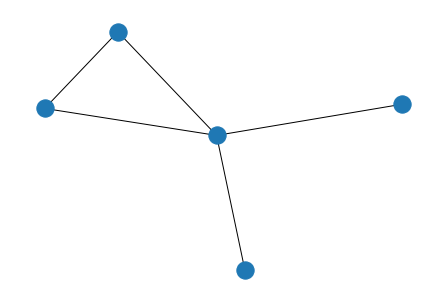

In [ ]:
nx.draw(g)

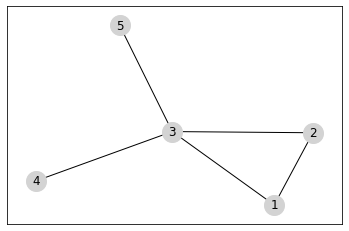

In [ ]:
# visualizando a rede/grafo
nx.draw_networkx(g, node_color='lightgray', node_size=400)

In [ ]:
# fixando as posições dos nós
position = nx.spring_layout(g, seed=10)
position

{1: array([ 1.        , -0.34107473]),
 2: array([0.9302197 , 0.49365169]),
 3: array([-0.08951224, -0.00735702]),
 4: array([-0.99175984,  0.83160347]),
 5: array([-0.84894761, -0.97682341])}

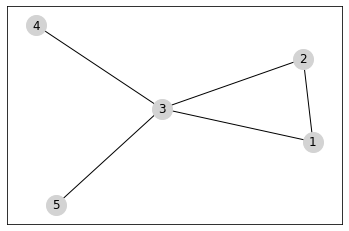

In [ ]:
# visualizando a rede/grafo com posições fixas
nx.draw_networkx(g, pos=position, node_color='lightgray', node_size=400)

In [ ]:
# obtendo as adjacencias/vizinhos de um nó
for i in g.neighbors(2):
  print(i)

1
3


In [ ]:
# obtendo as adjacencias/vizinhos de um nó
list(g.neighbors(3))

[1, 2, 4, 5]

In [ ]:
# verificando o grau dos nós
g.degree()

DegreeView({1: 2, 2: 2, 3: 4, 4: 1, 5: 1})

In [ ]:
# observando a lista de adjacencias
list(g.adjacency())

[(1, {2: {}, 3: {}}),
 (2, {1: {}, 3: {}}),
 (3, {1: {}, 2: {}, 4: {}, 5: {}}),
 (4, {3: {}}),
 (5, {3: {}})]

In [ ]:
# observando a matriz de adjacencias
nx.adjacency_matrix(g).todense()

array([[0, 1, 1, 0, 0],
       [1, 0, 1, 0, 0],
       [1, 1, 0, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]])

#### **Removendo Elementos**

In [ ]:
# removendo um nó
g.remove_node(1)

In [ ]:
# removendo uma aresta
g.remove_edge(5, 3)

In [ ]:
# assim como a operação de adicionar múltiplos nós e arestas,
# também podemos remover com: remove_nodes_from e remove_edges_from

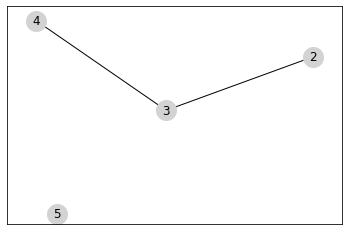

In [ ]:
# visualizando após remoção
nx.draw_networkx(g, pos=position, node_color='lightgray', node_size=400)

#### **Atributos do Grafo e seus Elementos**

In [ ]:
# criando um grafo com atributos
g1 = nx.Graph(nome='Frutas')
g1.graph

{'nome': 'Frutas'}

In [ ]:
# cria os nós com atributos
data = [
  (1, {'nome': 'pera'}),
  (2, {'nome': 'uva'}),
  (3, {'nome': 'maçã'}),
  (4, {'nome': 'laranja'})
]

g1.add_nodes_from(data)

In [ ]:
# verifica os atributos dos nós
g1.nodes(data=True)

NodeDataView({1: {'nome': 'pera'}, 2: {'nome': 'uva'}, 3: {'nome': 'maçã'}, 4: {'nome': 'laranja'}})

In [ ]:
# obtendo os atributos dos nós
nx.get_node_attributes(g1, 'nome')

{1: 'pera', 2: 'uva', 3: 'maçã', 4: 'laranja'}

In [ ]:
# adicionando arestas com atributo peso
g1.add_edge(1, 2, weight=4)

In [ ]:
# adicionando multiplas arestas com atributo peso
g1.add_weighted_edges_from([(1,3,2), (2,3,3), (3,4,1)])

In [ ]:
# verifica os atributos das arestas
g1.edges(data=True)

EdgeDataView([(1, 2, {'weight': 4}), (1, 3, {'weight': 2}), (2, 3, {'weight': 3}), (3, 4, {'weight': 1})])

In [ ]:
# obtendo um atributo das arestas
edge_weight = nx.get_edge_attributes(g1, 'weight')
edge_weight

{(1, 2): 4, (1, 3): 2, (2, 3): 3, (3, 4): 1}

In [ ]:
list(edge_weight.values())

[4, 2, 3, 1]

In [ ]:
# nx.draw(...)
# nx.draw_networkx(...)

# nx.draw_networkx_nodes()
# nx.draw_networkx_labels()
# nx.draw_networkx_edges()
# nx.draw_networkx_edges_labels()

In [ ]:
g1.nodes(data=True)

NodeDataView({1: {'nome': 'pera'}, 2: {'nome': 'uva'}, 3: {'nome': 'maçã'}, 4: {'nome': 'laranja'}})

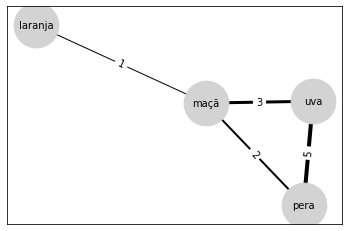

In [ ]:
# customizando a visualização com os atributos
position = nx.spring_layout(g1, seed=10)

# draw nodes
nx.draw_networkx_nodes(g1, pos=position, node_color='lightgray', node_size=2000)

# draw labels
labels = nx.get_node_attributes(g1, 'nome')
nx.draw_networkx_labels(g1, pos=position, labels=labels, font_size=10)

# draw edges
edge_labels = nx.get_edge_attributes(g1, 'weight')
nx.draw_networkx_edges(g1, pos=position, width=list(edge_weight.values()))

# draw edge labels
nx.draw_networkx_edge_labels(g1, pos=position, edge_labels=edge_labels)

plt.show()

In [ ]:
# alterando ou inserindo atributos das arestas por atribuição
g1[1][2]['weight'] = 5

#### **Criando um Dígrafo**

In [ ]:
# criando um digrafo
d = nx.DiGraph()
d

In [ ]:
# adicionando nós

# a, b, c, d
d.add_nodes_from(['a', 'b', 'c', 'd'])

In [ ]:
# verificando nós
d.nodes()

NodeView(('a', 'b', 'c', 'd'))

In [ ]:
# adicionando arestas
d.add_edges_from([('a', 'a'), ('a', 'b'), ('a', 'd'), ('c', 'd'), ('a', 'c')])

In [ ]:
# verificando arestas
d.edges()

OutEdgeView([('a', 'b'), ('a', 'd'), ('a', 'c'), ('a', 'a'), ('c', 'd')])

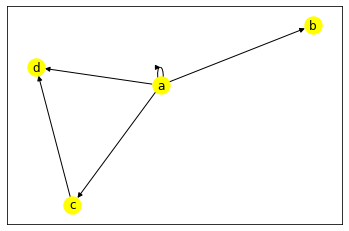

In [ ]:
# visualiza o digrafo
nx.draw_networkx(d, node_color='yellow', node_size=300)

In [ ]:
# observando o grau de cada nó
d.degree()

DiDegreeView({'a': 5, 'b': 1, 'c': 2, 'd': 2})

In [ ]:
# observando o grau de entrada de cada nó
d.in_degree()

InDegreeView({'a': 1, 'b': 1, 'c': 1, 'd': 2})

In [ ]:
# observando o grau de saída de cada nó
d.out_degree()

OutDegreeView({'a': 4, 'b': 0, 'c': 1, 'd': 0})

#### **Gerando Grafos**

link doc: https://networkx.org/documentation/stable/reference/generators.html

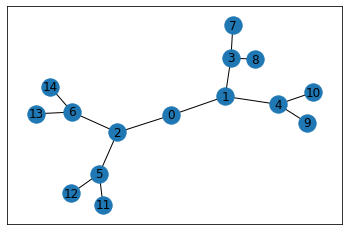

In [ ]:
# cria uma árvore balanceado
my_graph = nx.balanced_tree(2, 3)
nx.draw_networkx(my_graph)

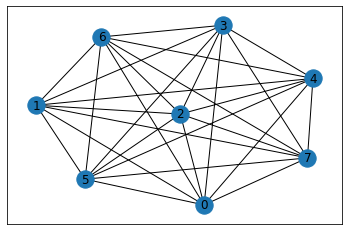

In [ ]:
# cria grafo completo, com todos vértices conectados
my_graph = nx.complete_graph(8)
nx.draw_networkx(my_graph)

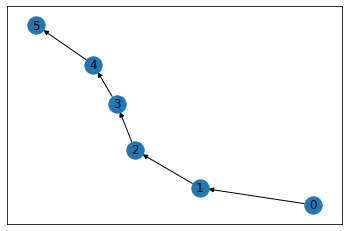

In [ ]:
# cria um grafo estilo trilha
my_graph = nx.path_graph(6, create_using=nx.DiGraph())
nx.draw_networkx(my_graph)

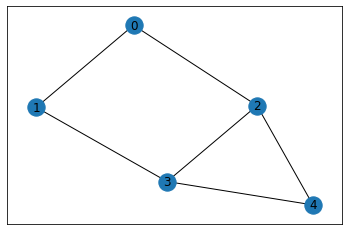

In [ ]:
# cria um grafo estilo casa
my_graph = nx.house_graph()
nx.draw_networkx(my_graph)

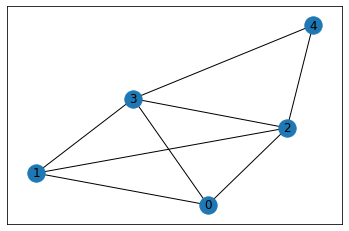

In [ ]:
my_graph = nx.house_x_graph()
nx.draw_networkx(my_graph)

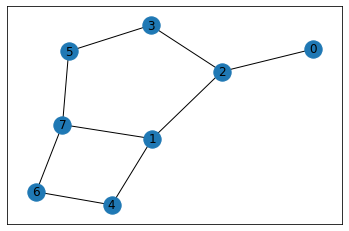

In [ ]:
# cria um grafo randomico
my_graph = nx.gnp_random_graph(8, 0.2, seed=42, directed=False)
nx.draw_networkx(my_graph)

#### **Métricas de Centralidade**

**Degree (Grau)**

O **grau (degree) de um nó** é definido como **o número de vizinhos** daquele nó; ou, equivalentemente, **o número de conexões** que um nó faz.

Em outras palavras,

- Quanto maior o degree de um nó, mais conexões um nó tem;
- Quanto menor o degree de um nó, menos conexões um nó tem;

Um ponto importante do degree é que esta é uma medida **local**, no sentido de que, ao saber o degree de um dado nó, não sabemos nada sobre o degree de seus vizinhos. Por este motivo, a centralidade dá apenas informações locais, falhando em dar uma informação mais global sobre a rede.


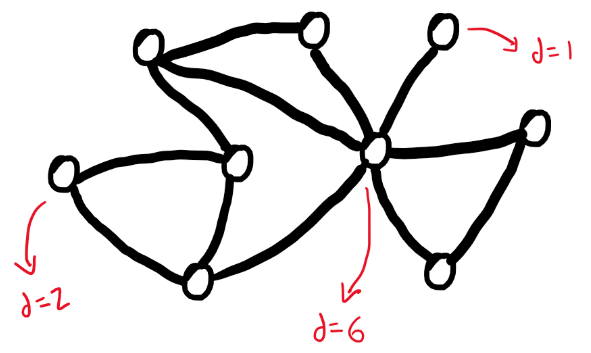

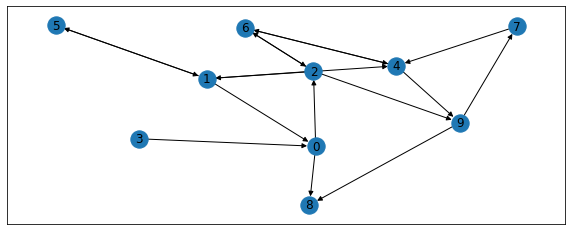

In [ ]:
# cria um grafo randomico
plt.figure(figsize=(10,4))
my_graph = nx.gnp_random_graph(10, 0.2, seed=42, directed=True)
position = nx.spring_layout(my_graph, seed=10)
nx.draw_networkx(my_graph, pos=position)
plt.show()

In [ ]:
my_graph.degree()

DiDegreeView({0: 4, 1: 5, 2: 5, 3: 1, 4: 5, 5: 2, 6: 4, 7: 2, 8: 2, 9: 4})

In [ ]:
# calcula a centralidade por grau de cada nó
nx.degree_centrality(my_graph)

{0: 0.4444444444444444,
 1: 0.5555555555555556,
 2: 0.5555555555555556,
 3: 0.1111111111111111,
 4: 0.5555555555555556,
 5: 0.2222222222222222,
 6: 0.4444444444444444,
 7: 0.2222222222222222,
 8: 0.2222222222222222,
 9: 0.4444444444444444}

**Closeness (Proximidade)**

Como o próprio nome indica, a **proximidade (closeness)** de um nó mede a média dentre os caminhos mais curtos entre o dado nó e os demais nós acessíveis a partir dele. Ou seja, esta é uma medida que indica o quanto um nó está proximo dos demais. 

Em outras palavras,

- Quanto maior a closeness de um nó, mais próximo, em média, ele está dos demais nós.
- Quanto menor a closeness de um nó, mais distante, em média, ele está dos demais nós.

Note que, diferente do degree, a closeness é uma medida com caráter mais global, pois para calculá-la, olhamos para o grafo globalmente, examinando os caminhos mais curtos.

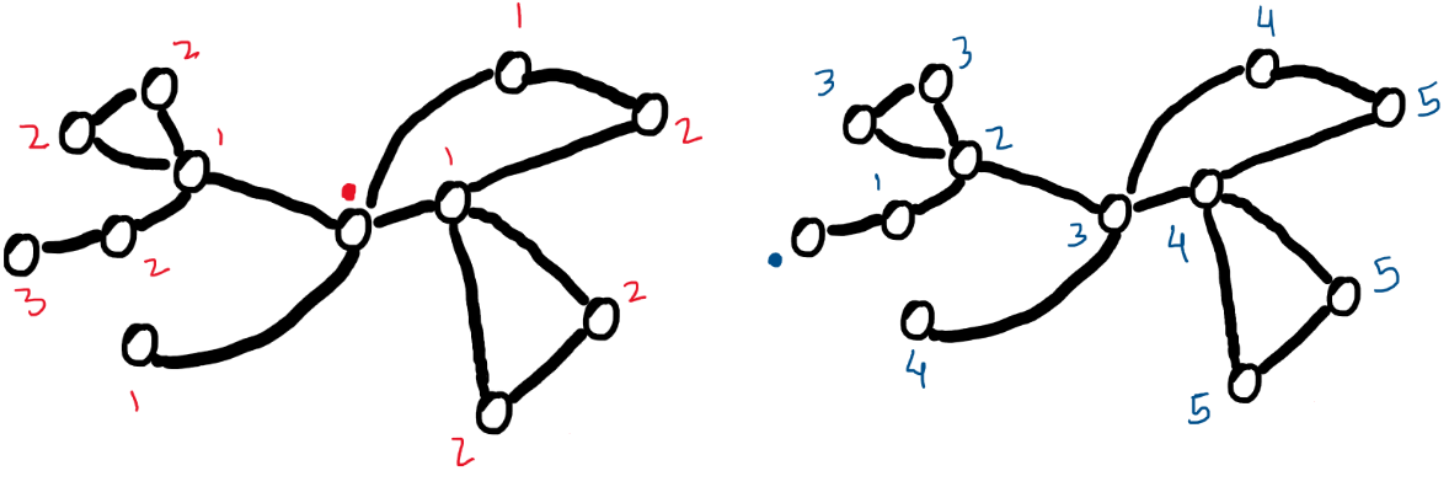

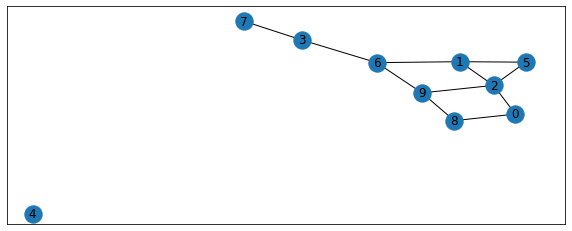

In [ ]:
# cria um grafo randomico
plt.figure(figsize=(10,4))
my_graph = nx.gnp_random_graph(10, 0.2, seed=42, directed=False)
position = nx.spring_layout(my_graph, seed=10)
nx.draw_networkx(my_graph, pos=position)
plt.show()

In [ ]:
# calcula a centralidade por proximidade de cada nó
nx.closeness_centrality(my_graph)

{0: 0.35555555555555557,
 1: 0.47407407407407404,
 2: 0.47407407407407404,
 3: 0.3742690058479532,
 4: 0.0,
 5: 0.3950617283950617,
 6: 0.5079365079365079,
 7: 0.27350427350427353,
 8: 0.3742690058479532,
 9: 0.5079365079365079}

**Betweenness (intermediação)**

A medida de centralidade de **intermediação (betweenness)** de um nó e definida como **a fração de caminhos mais curtos que incluem este nó**. Ou seja, esta medida indica o quanto de informação passa pelo nó, isto é, o quanto que ele é "intermediário", no sentido dos caminhos mais curtos.

Existe uma interpretação interessante pra betweenness: um nó com alta betweenness é tal que exerce **uma grande influência** entre os nós que ele conecta, de modo que este nó pode ser visto como uma "ponte". Se o nó for alterado ou removido, o efeito terá uma ampla escala, pois, sendo uma "ponte", esta influência é carregada para diferentes porções do grafo.

Em outras palavras,

- Quanto maior a betweenness de um nó, maior é sua influência em nós cujos caminhos passam por ele. Nós que são "pontes" terão alta betweeness.
- Quanto menor a betweenness de um nó, menor é sua influência em nós cujos caminhos passam por ele. Nós nas extremidades do grafo terão baixa betweenness.

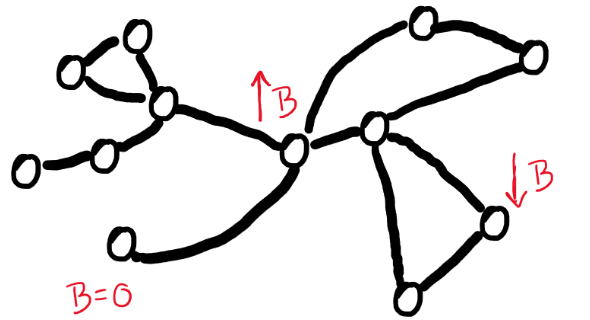

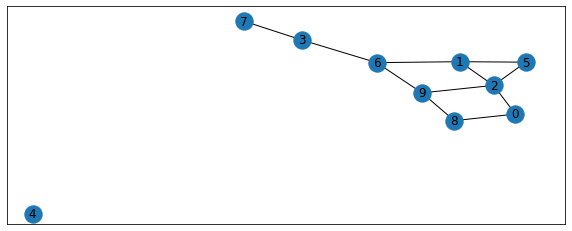

In [ ]:
# cria um grafo randomico
plt.figure(figsize=(10,4))
my_graph = nx.gnp_random_graph(10, 0.2, seed=42, directed=False)
position = nx.spring_layout(my_graph, seed=10)
nx.draw_networkx(my_graph, pos=position)
plt.show()

In [ ]:
# calcula a centralidade por intermediação de cada nó
nx.betweenness_centrality(my_graph)

{0: 0.037037037037037035,
 1: 0.15277777777777776,
 2: 0.2129629629629629,
 3: 0.19444444444444442,
 4: 0.0,
 5: 0.0,
 6: 0.35648148148148145,
 7: 0.0,
 8: 0.041666666666666664,
 9: 0.22685185185185183}

Um resumo legal das 3 medidas de centralidade:

<img src="https://image.slidesharecdn.com/icsm-docsym-090919140350-phpapp01/95/changes-and-bugs-mining-and-predicting-development-activities-19-728.jpg?cb=1253447625" width=500>

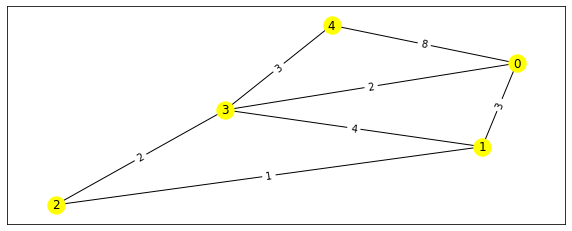

In [ ]:
plt.figure(figsize=(10,4))
g3 = nx.Graph()

g3.add_node(0)
g3.add_node(1)
g3.add_node(2)
g3.add_node(3)
g3.add_node(4)

g3.add_edge(0, 4, weight=8)
g3.add_edge(0, 1, weight=3)
g3.add_edge(0, 3, weight=2)
g3.add_edge(1, 2, weight=1)
g3.add_edge(1, 3, weight=4)
g3.add_edge(2, 3, weight=2)
g3.add_edge(3, 4, weight=3)

pos = nx.spring_layout(g3, seed=42) 
nx.draw_networkx(g3, pos, node_color="yellow")

labels = nx.get_edge_attributes(g3, 'weight')
nx.draw_networkx_edge_labels(g3, pos, edge_labels=labels)

plt.show()

In [ ]:
g3.degree(weight='weight')

DegreeView({0: 13, 1: 8, 2: 3, 3: 11, 4: 11})

In [ ]:
g3.degree()

DegreeView({0: 3, 1: 3, 2: 2, 3: 4, 4: 2})

In [ ]:
# calcula e printa os 3 tipos de centralidade
print(nx.degree_centrality(g3))
print(nx.closeness_centrality(g3))
print(nx.betweenness_centrality(g3))

{0: 0.75, 1: 0.75, 2: 0.5, 3: 1.0, 4: 0.5}
{0: 0.8, 1: 0.8, 2: 0.6666666666666666, 3: 1.0, 4: 0.6666666666666666}
{0: 0.08333333333333333, 1: 0.08333333333333333, 2: 0.0, 3: 0.3333333333333333, 4: 0.0}


#### **Caminho mais Curto (Shortest Path)**

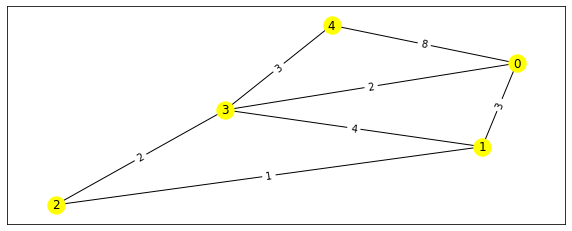

In [ ]:
plt.figure(figsize=(10,4))
nx.draw_networkx(g3, pos, node_color="yellow")
nx.draw_networkx_edge_labels(g3, pos, edge_labels=labels)
plt.show()

In [ ]:
# calculando o menor caminho entre 2 pontos
nx.shortest_path(g3, source=0, target=4, weight='weight', method='dijkstra')

[0, 3, 4]

In [ ]:
# calculando o menor caminho entre 1 ponto e os demais
distance, path = nx.single_source_dijkstra(g3, source=0, weight='weight')
print(distance)
print(path)

{0: 0, 3: 2, 1: 3, 2: 4, 4: 5}
{0: [0], 4: [0, 3, 4], 1: [0, 1], 3: [0, 3], 2: [0, 3, 2]}


In [ ]:
# calculando o menor caminho entre todos os nós
dict_dijkstra = dict(nx.all_pairs_dijkstra(g3, weight='weight'))
pprint(dict_dijkstra)

{0: ({0: 0, 1: 3, 2: 4, 3: 2, 4: 5},
     {0: [0], 1: [0, 1], 2: [0, 3, 2], 3: [0, 3], 4: [0, 3, 4]}),
 1: ({0: 3, 1: 0, 2: 1, 3: 3, 4: 6},
     {0: [1, 0], 1: [1], 2: [1, 2], 3: [1, 2, 3], 4: [1, 2, 3, 4]}),
 2: ({0: 4, 1: 1, 2: 0, 3: 2, 4: 5},
     {0: [2, 1, 0], 1: [2, 1], 2: [2], 3: [2, 3], 4: [2, 3, 4]}),
 3: ({0: 2, 1: 3, 2: 2, 3: 0, 4: 3},
     {0: [3, 0], 1: [3, 2, 1], 2: [3, 2], 3: [3], 4: [3, 4]}),
 4: ({0: 5, 1: 6, 2: 5, 3: 3, 4: 0},
     {0: [4, 3, 0], 1: [4, 3, 2, 1], 2: [4, 3, 2], 3: [4, 3], 4: [4]})}


# **Estudo de Caso**

Dado o grafo abaixo contendo 5 cidades brasileiras e a distância entre elas, resolva os pontos abaixo:

- quantos nós tem o grafo?
- quantas arestas tem o grafo?
- imprima sua matriz de adjacência
- imprima sua lista de adjacência
- qual o grau de cada nó?
- qual a medida de centralidade por grau de cada nó?
- qual a medida de centralidade por proximidade de cada nó?
- qual a medida de centralidade por intermediação de cada nó?
- qual a melhor rota para ir de Brasíla a São Paulo?
- qual a melhor rota de ir de Brasília a Rio de Janeiro?
- resolva o "problema do caixeiro viajante": qual a melhor rota visitando todos os vértices apenas uma vez?

*Conceituação do problema: "O Problema do Caixeiro Viajante (PCV) é um problema que tenta determinar a menor rota para percorrer uma série de cidades (visitando uma única vez cada uma delas), retornando à cidade de origem. Ele é um problema de otimização NP-difícil inspirado na necessidade dos vendedores em realizar entregas em diversos locais (as cidades) percorrendo o menor caminho possível, reduzindo o tempo necessário para a viagem e os possíveis custos com transporte e combustível.*


fonte: [wikipedia](https://pt.wikipedia.org/wiki/Problema_do_caixeiro-viajante)

In [ ]:
# importar a lib
import networkx as nx
import matplotlib.pyplot as plt

from pprint import pprint

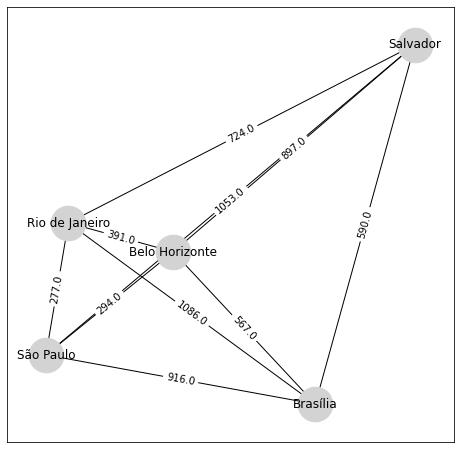

In [ ]:
"""
Grafo criado com ChatGPT, com alguns ajustes: create graph to travelling salesman 
problem with networkx and five brazilian cities, using their distance as weight
of edges. Add the edge labels and use latitude and longitude as position of nodes.
"""

plt.figure(figsize=(8,8))

# Define the cities and their latitude and longitude
cities = {
    "Rio de Janeiro": (22.9068, 43.1729),
    "São Paulo": (23.5505, 46.6333),
    "Belo Horizonte": (19.9012, 43.9321),
    "Brasília": (15.8267, 47.9218),
    "Salvador": (12.9724, 38.5020)
}

# Define the distances between the cities
distances = {
    ("Rio de Janeiro", "São Paulo"): 277.0,
    ("Rio de Janeiro", "Belo Horizonte"): 391.0,
    ("Rio de Janeiro", "Brasília"): 1086.0,
    ("Rio de Janeiro", "Salvador"): 724.0,
    ("São Paulo", "Belo Horizonte"): 294.0,
    ("São Paulo", "Brasília"): 916.0,
    ("São Paulo", "Salvador"): 1053.0,
    ("Belo Horizonte", "Brasília"): 567.0,
    ("Belo Horizonte", "Salvador"): 897.0,
    ("Brasília", "Salvador"): 590.0
}

# Create the graph
G = nx.Graph()

# Add the cities as nodes to the graph
for city in cities:
    G.add_node(city, pos=cities[city])

# Add the edges between the cities with their corresponding distances as the weight
for edge in distances:
    G.add_edge(edge[0], edge[1], weight=distances[edge])

# Specify the positions of the nodes based on their latitude and longitude
pos = nx.get_node_attributes(G, "pos")

# Draw the graph
nx.draw_networkx(G, pos, node_color='lightgray', node_size=1200)

# Add the edge labels
labels = {(u, v): d["weight"] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

# Show the graph
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.show()



- 1, 2 = 2! = 2
1 -> 2
2 -> 1

- 1 2 3 = 3! = 6
1, 2, 3
1, 3, 2
2, 1, 3
2, 3, 1
3, 1, 2
3, 1, 3

In [ ]:
# - quantos nós tem o grafo?
len(G.nodes()), G.number_of_nodes()

(5, 5)

In [ ]:
# - quantas arestas tem o grafo?
len(G.edges()), G.number_of_edges()

(10, 10)

In [ ]:
# - imprima sua matriz de adjacência
nx.adjacency_matrix(G).todense()

array([[   0.,  277.,  391., 1086.,  724.],
       [ 277.,    0.,  294.,  916., 1053.],
       [ 391.,  294.,    0.,  567.,  897.],
       [1086.,  916.,  567.,    0.,  590.],
       [ 724., 1053.,  897.,  590.,    0.]])

In [ ]:
# - imprima sua lista de adjacência
pprint(dict(G.adjacency()))

{'Belo Horizonte': {'Brasília': {'weight': 567.0},
                    'Rio de Janeiro': {'weight': 391.0},
                    'Salvador': {'weight': 897.0},
                    'São Paulo': {'weight': 294.0}},
 'Brasília': {'Belo Horizonte': {'weight': 567.0},
              'Rio de Janeiro': {'weight': 1086.0},
              'Salvador': {'weight': 590.0},
              'São Paulo': {'weight': 916.0}},
 'Rio de Janeiro': {'Belo Horizonte': {'weight': 391.0},
                    'Brasília': {'weight': 1086.0},
                    'Salvador': {'weight': 724.0},
                    'São Paulo': {'weight': 277.0}},
 'Salvador': {'Belo Horizonte': {'weight': 897.0},
              'Brasília': {'weight': 590.0},
              'Rio de Janeiro': {'weight': 724.0},
              'São Paulo': {'weight': 1053.0}},
 'São Paulo': {'Belo Horizonte': {'weight': 294.0},
               'Brasília': {'weight': 916.0},
               'Rio de Janeiro': {'weight': 277.0},
               'Salvador': {'weight

In [ ]:
# - qual o grau de cada nó?
G.degree()

DegreeView({'Rio de Janeiro': 4, 'São Paulo': 4, 'Belo Horizonte': 4, 'Brasília': 4, 'Salvador': 4})

In [ ]:
# - qual a medida de centralidade por grau de cada nó?
nx.degree_centrality(G)

{'Rio de Janeiro': 1.0,
 'São Paulo': 1.0,
 'Belo Horizonte': 1.0,
 'Brasília': 1.0,
 'Salvador': 1.0}

In [ ]:
# - qual a medida de centralidade por proximidade de cada nó?
nx.closeness_centrality(G)

{'Rio de Janeiro': 1.0,
 'São Paulo': 1.0,
 'Belo Horizonte': 1.0,
 'Brasília': 1.0,
 'Salvador': 1.0}

In [ ]:
# - qual a medida de centralidade por intermediação de cada nó?
nx.betweenness_centrality(G)

{'Rio de Janeiro': 0.0,
 'São Paulo': 0.0,
 'Belo Horizonte': 0.0,
 'Brasília': 0.0,
 'Salvador': 0.0}

In [ ]:
# - qual a melhor rota para ir de Brasíla a São Paulo?
nx.shortest_path(G, source='Brasília', target='São Paulo', weight='weight')

['Brasília', 'Belo Horizonte', 'São Paulo']

In [ ]:
# - qual a melhor rota de ir de Brasília a Rio de Janeiro?
nx.shortest_path(G, source='Brasília', target='Rio de Janeiro', weight='weight')

['Brasília', 'Belo Horizonte', 'Rio de Janeiro']

In [ ]:
# - resolva o "problema do caixeiro viajante": qual a melhor rota visitando todos os vértices apenas uma vez?
pcv = nx.approximation.traveling_salesman_problem
pcv(G)

['Rio de Janeiro',
 'Salvador',
 'Brasília',
 'Belo Horizonte',
 'São Paulo',
 'Rio de Janeiro']

In [ ]:
pcv(G, nodes=['Rio de Janeiro', 'Salvador', 'Brasília'])

['Rio de Janeiro', 'Belo Horizonte', 'Brasília', 'Salvador', 'Rio de Janeiro']

# **Exercícios**

Realiza os exercicios e responda o forms de avaliação para aula 07: https://docs.google.com/forms/d/e/1FAIpQLSeSxB-FpmezTd1D6DHf80tybSIJ2YgO9bb3OFBhJfagfSZaiw/viewform

**Questão 01**

Implemente o grafo ilustrado pela figura abaixo utilizando networkx. Em seguida, responda as seguintes questões:

- quantos nós tem o grafo?
- quantas arestas tem o grafo?
- imprima sua matriz de adjacência
- imprima sua lista de adjacência
- qual o grau de cada nó?
- qual a medida de centralidade por grau de cada nó?
- qual a medida de centralidade por proximidade de cada nó?
- qual a medida de centralidade por intermediação de cada nó?

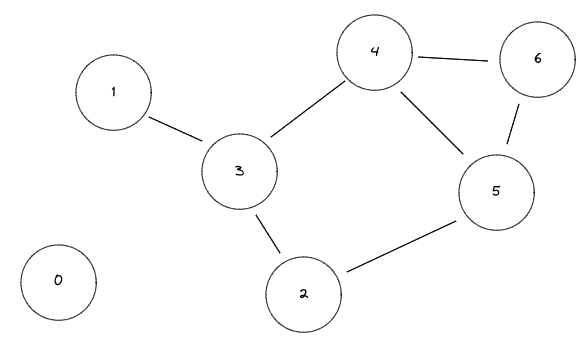

In [2]:
# importar as libs
from pprint import pprint
#%pip install matplotlib
import matplotlib.pyplot as plt
import networkx as nx

In [10]:
# Criando o grafo

grafo1 = nx.Graph()

grafo1.add_nodes_from([0,1,2,3,4,5,6])

In [11]:
grafo1.add_edges_from([(1,3),(3,2),(2,5),(5,6),(5,4),(6,4),(4,3)])

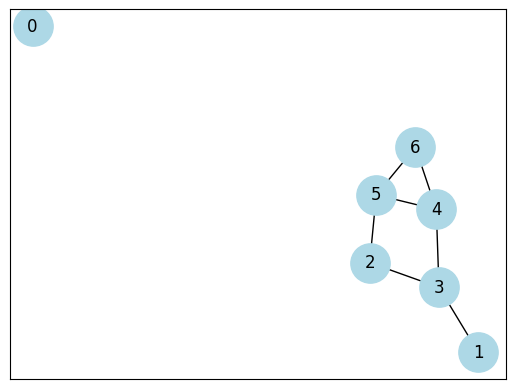

In [18]:
position = nx.spring_layout(grafo1, seed=16)
nx.draw_networkx(grafo1, pos=position, node_color='lightblue', node_size=800)

In [37]:
# respondendo as perguntas

print('Respostas: \n')

# - quantos nós tem o grafo?
qtde_nos = len(grafo1.nodes())
print(f'Quantidade de nós: {qtde_nos}')

# - quantas arestas tem o grafo?
qtde_arestas = len(grafo1.edges())
print(f'Quantidade de arestas: {qtde_arestas} \n')

# - imprima sua matriz de adjacência
matriz_grafo1 = nx.adjacency_matrix(grafo1).todense()
print(f'Matriz de adjacência: \n {matriz_grafo1} \n')

# - imprima sua lista de adjacência
lista_grafo1 = list(grafo1.adjacency())
print(f'lista de adjacência: \n {lista_grafo1} \n')

# - qual o grau de cada nó?
grau_nos = nx.degree(grafo1)
print(f'Grau dos nós: \n {grau_nos} \n')

# - qual a medida de centralidade por grau de cada nó?
centralidade_grau = nx.degree_centrality(grafo1)
print(f'Medida de centralidade por grau: \n {centralidade_grau} \n')

# - qual a medida de centralidade por proximidade de cada nó?
centralidade_prox = nx.closeness_centrality(grafo1)
print(f'Medida de centralidade por aproximação: \n {centralidade_prox} \n')

# - qual a medida de centralidade por intermediação de cada nó?
centralidade_inter = nx.betweenness_centrality(grafo1)
print(f'Medida de centralidade por intermediação: \n {centralidade_inter} \n')

Respostas: 

Quantidade de nós: 7
Quantidade de arestas: 7 

Matriz de adjacência: 
 [[0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 1 0]
 [0 1 1 0 1 0 0]
 [0 0 0 1 0 1 1]
 [0 0 1 0 1 0 1]
 [0 0 0 0 1 1 0]] 

lista de adjacência: 
 [(0, {}), (1, {3: {}}), (2, {3: {}, 5: {}}), (3, {1: {}, 2: {}, 4: {}}), (4, {5: {}, 6: {}, 3: {}}), (5, {2: {}, 6: {}, 4: {}}), (6, {5: {}, 4: {}})] 

Grau dos nós: 
 [(0, 0), (1, 1), (2, 2), (3, 3), (4, 3), (5, 3), (6, 2)] 

Medida de centralidade por grau: 
 {0: 0.0, 1: 0.16666666666666666, 2: 0.3333333333333333, 3: 0.5, 4: 0.5, 5: 0.5, 6: 0.3333333333333333} 

Medida de centralidade por aproximação: 
 {0: 0.0, 1: 0.3787878787878788, 2: 0.5208333333333334, 3: 0.5952380952380952, 4: 0.5952380952380952, 5: 0.5208333333333334, 6: 0.462962962962963} 

Medida de centralidade por intermediação: 
 {0: 0.0, 1: 0.0, 2: 0.06666666666666667, 3: 0.3, 4: 0.2, 5: 0.1, 6: 0.0} 



**Questão 02**

Implemente o grafo ilustrado pela figura abaixo utilizando networkx. Em seguida, responda as seguintes questões:

- quantos nós tem o grafo?
- quantas arestas tem o grafo?
- imprima sua matriz de adjacência
- imprima sua lista de adjacência
- qual o grau de cada nó?
- qual a medida de centralidade por grau de cada nó?
- qual a medida de centralidade por proximidade de cada nó?
- qual a medida de centralidade por intermediação de cada nó?

<img src=https://ycpcs.github.io/cs360-spring2019/lectures/images/lecture15/digraph.png width=400>

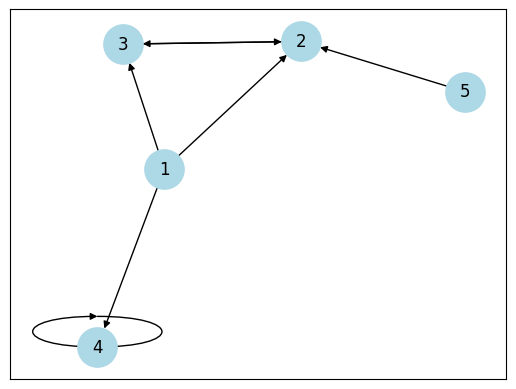

In [51]:
grafo2 = nx.DiGraph()

grafo2.add_nodes_from([1,2,3,4,5])
grafo2.add_edges_from([(1,3), (1,2), (1,4), (2,3), (3,2), (4,4), (5,2)])
position2 = nx.spring_layout(grafo2, seed=20)
nx.draw_networkx(grafo2, pos=position2, node_color='lightblue', node_size=800)

In [50]:
print('Respostas: \n')

# - quantos nós tem o grafo?
qtde_nos2 = len(grafo2.nodes())
print(f'Quantidade de nós: {qtde_nos2}')

# - quantas arestas tem o grafo?
qtde_arestas2 = len(grafo2.edges())
print(f'Quantidade de arestas: {qtde_arestas2} \n')

# - imprima sua matriz de adjacência
matriz_grafo2 = nx.adjacency_matrix(grafo2).todense()
print(f'Matriz de adjacência: \n {matriz_grafo2} \n')

# - imprima sua lista de adjacência
lista_grafo2 = list(grafo2.adjacency())
print(f'lista de adjacência: \n {lista_grafo2} \n')

# - qual o grau de cada nó?
grau_nos2 = nx.degree(grafo2)
print(f'Grau dos nós: \n {grau_nos2} \n')

# - qual a medida de centralidade por grau de cada nó?
centralidade_grau_g2 = nx.degree_centrality(grafo2)
print(f'Medida de centralidade por grau: \n {centralidade_grau_g2} \n')

# - qual a medida de centralidade por proximidade de cada nó?
centralidade_prox_g2 = nx.closeness_centrality(grafo2)
print(f'Medida de centralidade por aproximação: \n {centralidade_prox_g2} \n')

# - qual a medida de centralidade por intermediação de cada nó?
centralidade_inter_g2 = nx.betweenness_centrality(grafo2)
print(f'Medida de centralidade por intermediação: \n {centralidade_inter_g2} \n')

Respostas: 

Quantidade de nós: 5
Quantidade de arestas: 7 

Matriz de adjacência: 
 [[0 1 1 1 0]
 [0 0 1 0 0]
 [0 1 0 0 0]
 [0 0 0 1 0]
 [0 1 0 0 0]] 

lista de adjacência: 
 [(1, {3: {}, 2: {}, 4: {}}), (2, {3: {}}), (3, {2: {}}), (4, {4: {}}), (5, {2: {}})] 

Grau dos nós: 
 [(1, 3), (2, 4), (3, 3), (4, 3), (5, 1)] 

Medida de centralidade por grau: 
 {1: 0.75, 2: 1.0, 3: 0.75, 4: 0.75, 5: 0.25} 

Medida de centralidade por aproximação: 
 {1: 0.0, 2: 0.75, 3: 0.5625, 4: 0.25, 5: 0.0} 

Medida de centralidade por intermediação: 
 {1: 0.0, 2: 0.08333333333333333, 3: 0.0, 4: 0.0, 5: 0.0} 



**Questão 03**

Implemente o grafo ilustrado pela figura abaixo utilizando networkx. Em seguida, responda as seguintes questões:

- quantos nós tem o grafo?
- quantas arestas tem o grafo?
- imprima sua matriz de adjacência
- imprima sua lista de adjacência
- qual o grau de cada nó?
- qual a medida de centralidade por grau de cada nó?
- qual a medida de centralidade por proximidade de cada nó?
- qual a medida de centralidade por intermediação de cada nó?
- resolva o PCV com a melhor rota passando por todos nós

<img src="https://ucarecdn.com/a67cb888-aa0c-424b-8c7f-847e38dd5691/" width=400>

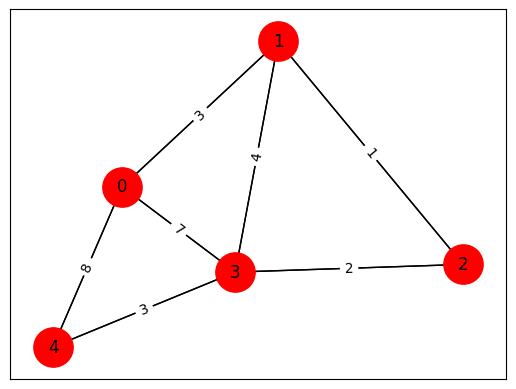

In [16]:
grafo3 = nx.Graph()
grafo3.add_nodes_from([0,1,2,3,4])
grafo3.add_weighted_edges_from([(0,1,3),(0,3,7),(0,4,8),(1,2,1),(1,3,4),(2,3,2),(3,4,3)])
position3 = nx.spring_layout(grafo3, seed=90)
# criando visualização de nós
nx.draw_networkx(grafo3, pos=position3, node_color='red', node_size=800)
# criando visualização de label dos nós
#labels = nx.get_node_attributes(grafo3,'nome')
#nx.draw_networkx_labels(grafo3, pos=position3, labels=labels, font_size=10)
# criando visulização das arestas
nx.draw_networkx_edges(grafo3, pos=position3)
# criando visualização edge labels
e_labels = nx.get_edge_attributes(grafo3, 'weight')
nx.draw_networkx_edge_labels(grafo3, pos=position3, edge_labels=e_labels)
plt.show()

In [22]:
print('Respostas: \n')

# - quantos nós tem o grafo?
qtde_nos3 = len(grafo3.nodes())
print(f'Quantidade de nós: {qtde_nos3}')

# - quantas arestas tem o grafo?
qtde_arestas3 = len(grafo3.edges())
print(f'Quantidade de arestas: {qtde_arestas3} \n')

# - imprima sua matriz de adjacência
matriz_grafo3 = nx.adjacency_matrix(grafo3).todense()
print(f'Matriz de adjacência: \n {matriz_grafo3} \n')

# - imprima sua lista de adjacência
lista_grafo3 = list(grafo3.adjacency())
print(f'lista de adjacência: \n {lista_grafo3} \n')

# - qual o grau de cada nó?
grau_nos3 = nx.degree(grafo3)
print(f'Grau dos nós: \n {grau_nos3} \n')

# - qual a medida de centralidade por grau de cada nó?
centralidade_grau_g3 = nx.degree_centrality(grafo3)
print(f'Medida de centralidade por grau: \n {centralidade_grau_g3} \n')

# - qual a medida de centralidade por proximidade de cada nó?
centralidade_prox_g3 = nx.closeness_centrality(grafo3)
print(f'Medida de centralidade por aproximação: \n {centralidade_prox_g3} \n')

# - qual a medida de centralidade por intermediação de cada nó?
centralidade_inter_g3 = nx.betweenness_centrality(grafo3)
print(f'Medida de centralidade por intermediação: \n {centralidade_inter_g3} \n')

# pergunta extra: qual o caminho mais curto de 4 até 1
short4_1 = nx.shortest_path(grafo3, source=4, target=1, weight='weight')
print(f'Caminho mais curto de 4 até 1: \n {short4_1} \n')

#resolvendo o PVC
pcv_solution = nx.approximation.traveling_salesman_problem(grafo3)
print(f'Solução do PVC: \n {pcv_solution} \n')


Respostas: 

Quantidade de nós: 5
Quantidade de arestas: 7 

Matriz de adjacência: 
 [[0 3 0 7 8]
 [3 0 1 4 0]
 [0 1 0 2 0]
 [7 4 2 0 3]
 [8 0 0 3 0]] 

lista de adjacência: 
 [(0, {1: {'weight': 3}, 3: {'weight': 7}, 4: {'weight': 8}}), (1, {0: {'weight': 3}, 2: {'weight': 1}, 3: {'weight': 4}}), (2, {1: {'weight': 1}, 3: {'weight': 2}}), (3, {0: {'weight': 7}, 1: {'weight': 4}, 2: {'weight': 2}, 4: {'weight': 3}}), (4, {0: {'weight': 8}, 3: {'weight': 3}})] 

Grau dos nós: 
 [(0, 3), (1, 3), (2, 2), (3, 4), (4, 2)] 

Medida de centralidade por grau: 
 {0: 0.75, 1: 0.75, 2: 0.5, 3: 1.0, 4: 0.5} 

Medida de centralidade por aproximação: 
 {0: 0.8, 1: 0.8, 2: 0.6666666666666666, 3: 1.0, 4: 0.6666666666666666} 

Medida de centralidade por intermediação: 
 {0: 0.08333333333333333, 1: 0.08333333333333333, 2: 0.0, 3: 0.3333333333333333, 4: 0.0} 

Caminho mais curto de 4 até 1: 
 [4, 3, 2, 1] 

Solução do PVC: 
 [0, 4, 3, 2, 1, 0] 



**Desafio**

 O grafo dos estados do Brasil é definido da seguinte forma:

- Cada vértice é um dos estados estados da República Federativa do Brasil
- Dois estados são adjacentes se têm uma fronteira comum

<br>

<img src="https://www.researchgate.net/profile/Paulo-Feofiloff/publication/327057443/figure/fig1/AS:660253444153345@1534428096628/Figura-13-Adjacncia-entre-estados-do-Brasil-veja-exemplo-15.png" width=400>

Implemente o grafo no networkx e responda: 

- quantos nós tem o grafo?
- quantas arestas tem o grafo?
- imprima sua matriz de adjacência
- imprima sua lista de adjacência
- qual o grau de cada nó?
- qual a medida de centralidade por grau de cada nó?
- qual a medida de centralidade por proximidade de cada nó?
- qual a medida de centralidade por intermediação de cada nó?
- qual a melhor rota entre Paraná e Pará?
- qual a melhor rota entre RN e RS?
- resolva o PCV, definindo a melhor rota se tiver que passar pelos pontos: ES, MS, BA, CE, AM, TO e SP
- você consegue plotar o grafo de forma parecida com o real formato do Brasil?